In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [54]:
DATA_PATH = "../Dataset/raporPublikAsesmenNasional.csv"

print("Dataset exists:", os.path.exists(DATA_PATH))


Dataset exists: True


In [55]:
df = pd.read_csv(DATA_PATH, sep=';')
df.head()


,kd_kepsek_an,kd_sekolah,pendidikan_sederajat,jenis_sek,sts_sek,kurikulum,daerah_khusus,kd_kokab,wilayah_bagian,jenis_wilayah,...,SMK_KPL,SMK_PBEL,SMK_PIM,SMK_PKL,SMK_PKUR,SMK-SARPRAS,SMK_TEFA,SSV,TOC,TOR
0,K8500033,8500033,SMA/SMK/MA,Paket C,N,Kurikulum Merdeka,Tidak,190,Indonesia Barat,KOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"57,97","36,05","53,50"
1,K8500006,8500006,SMA/SMK/MA,Paket C,S,Kurikulum 2013,Tidak,272,Indonesia Barat,KOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"52,20","35,16","62,48"
2,K8500007,8500007,SMA/SMK/MA,Paket C,S,Kurikulum Merdeka,Tidak,62,Indonesia Barat,KOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"61,35","36,05","60,14"
3,K8500008,8500008,SMA/SMK/MA,Paket C,S,Kurikulum Merdeka,Tidak,104,Indonesia Barat,KABUPATEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"75,98","33,18","37,70"
4,K8500005,8500005,SMA/SMK/MA,Paket C,S,Kurikulum Merdeka,Tidak,59,Indonesia Barat,KABUPATEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"47,90","30,85","43,90"


In [56]:
print(df.shape)
df.info()
df.describe()


(1478, 79)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   kd_kepsek_an                   1478 non-null   object 
 1   kd_sekolah                     1478 non-null   int64  
 2   pendidikan_sederajat           1478 non-null   object 
 3   jenis_sek                      1478 non-null   object 
 4   sts_sek                        1478 non-null   object 
 5   kurikulum                      1364 non-null   object 
 6   daerah_khusus                  1478 non-null   object 
 7   kd_kokab                       1478 non-null   int64  
 8   wilayah_bagian                 1478 non-null   object 
 9   jenis_wilayah                  1478 non-null   object 
 10  status_wilayah                 1478 non-null   object 
 11  proporsi_pendidik_min_s1       1364 non-null   object 
 12  proporsi_pendidik_sertifikasi  1364 n

,kd_sekolah,kd_kokab,jumlah_peserta_didik,jumlah_pendidik,jumlah_r_kelas,jumlah_komp_milik,jumlah_perpus,jumlah_rombel,jumlah_siswa_rombel,jumlah_siswa_penerima_PIP
count,1.478000e+03,1478.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,6.378087e+06,252.335589,379.151760,26.032991,14.236804,6.425953,0.999267,13.794721,123.730205,116.871701
std,1.044141e+06,150.943737,387.046502,21.566623,10.545799,5.877043,0.514642,11.096870,129.599090,130.194433
min,5.100001e+06,1.000000,8.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000
25%,5.100377e+06,123.000000,110.000000,11.000000,6.000000,3.000000,1.000000,6.000000,34.000000,30.000000
50%,7.100050e+06,245.000000,229.500000,19.000000,11.000000,5.000000,1.000000,10.000000,74.000000,67.000000
75%,7.100247e+06,379.750000,524.500000,35.000000,19.000000,8.000000,1.000000,18.000000,173.000000,158.000000
max,9.500001e+06,513.000000,2523.000000,138.000000,84.000000,58.000000,5.000000,84.000000,823.000000,801.000000


In [57]:
target = "jenis_wilayah"
df[target].value_counts()


jenis_wilayah
KABUPATEN    1154
KOTA          324
Name: count, dtype: int64

In [58]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Hapus target dari categorical
if target in categorical_cols:
    categorical_cols.remove(target)

numeric_cols, categorical_cols


(['kd_sekolah',
  'kd_kokab',
  'jumlah_peserta_didik',
  'jumlah_pendidik',
  'jumlah_r_kelas',
  'jumlah_komp_milik',
  'jumlah_perpus',
  'jumlah_rombel',
  'jumlah_siswa_rombel',
  'jumlah_siswa_penerima_PIP'],
 ['kd_kepsek_an',
  'pendidikan_sederajat',
  'jenis_sek',
  'sts_sek',
  'kurikulum',
  'daerah_khusus',
  'wilayah_bagian',
  'status_wilayah',
  'proporsi_pendidik_min_s1',
  'proporsi_pendidik_sertifikasi',
  'rasio_pendidik_peserta_didik',
  'ketersediaan_internet',
  'ketersediaan_listrik',
  'rasio_siswa_penerima_PIP',
  'SES_sekolah',
  'APC',
  'APK',
  'BBS',
  'BCP',
  'COP',
  'CSV',
  'ENP',
  'EQC',
  'EQR',
  'HWS',
  'KKG',
  'KPC',
  'KPK',
  'KSA',
  'KSV',
  'LCS',
  'LFO',
  'MIP',
  'NAT',
  'OPC',
  'PBU',
  'PCP',
  'PGP',
  'PIP',
  'PKG',
  'PMU',
  'POT',
  'PPK',
  'PSA',
  'PSV',
  'PPC',
  'RC',
  'RKG',
  'RPI',
  'RSD',
  'SBU',
  'SCO',
  'SKG',
  'SMK_GRMAG',
  'SMK_GTIN',
  'SMK_INDS',
  'SMK_KLAB',
  'SMK_KOMITE',
  'SMK_KPL',
  'SMK_PBEL',

In [59]:
df = df.drop_duplicates()

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [60]:
le = LabelEncoder()
df[target] = le.fit_transform(df[target])
le.classes_


array(['KABUPATEN', 'KOTA'], dtype=object)

In [62]:
X = df[numeric_cols + categorical_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [63]:
preprocess = ColumnTransformer([
    ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
], remainder="passthrough")

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

pipeline = Pipeline([
    ("preprocess", preprocess),
    ("model", model)
])


In [64]:
pipeline.fit(X_train, y_train)
print("Model Training Selesai!")


Model Training Selesai!


In [65]:
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cls = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", cls)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.8040540540540541

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       231
           1       0.89      0.12      0.22        65

    accuracy                           0.80       296
   macro avg       0.85      0.56      0.55       296
weighted avg       0.82      0.80      0.74       296


Confusion Matrix:
 [[230   1]
 [ 57   8]]


In [66]:
os.makedirs("../Reports", exist_ok=True)

with open("../Reports/evaluation.txt", "w") as f:
    f.write(f"Accuracy: {acc}\n\n")
    f.write("Classification Report:\n")
    f.write(cls)
    f.write("\n\nConfusion Matrix:\n")
    f.write(str(cm))

print("evaluation.txt berhasil dibuat!")


evaluation.txt berhasil dibuat!


In [67]:
importances = pipeline.named_steps["model"].feature_importances_
encoded_cols = pipeline.named_steps["preprocess"].get_feature_names_out()

fi_df = pd.DataFrame({
    "fitur": encoded_cols,
    "importance": importances
})

fi_top20 = fi_df.sort_values(by="importance", ascending=False).head(20)
fi_top20.to_csv("../Reports/feature_importances_top20.csv", index=False)

fi_top20


,fitur,importance
953,categorical__status_wilayah_RURAL,0.044082
954,categorical__status_wilayah_URBAN,0.040058
7067,remainder__jumlah_peserta_didik,0.017273
7073,remainder__jumlah_siswa_rombel,0.015874
7066,remainder__kd_kokab,0.013879
7072,remainder__jumlah_rombel,0.013529
7068,remainder__jumlah_pendidik,0.012759
7074,remainder__jumlah_siswa_penerima_PIP,0.012609
7065,remainder__kd_sekolah,0.011781
7069,remainder__jumlah_r_kelas,0.010466


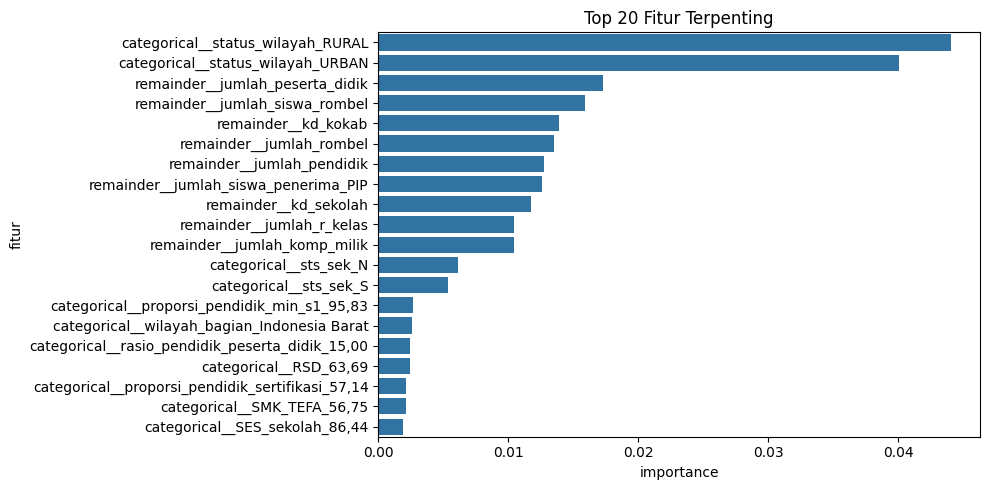

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(data=fi_top20, x="importance", y="fitur")
plt.title("Top 20 Fitur Terpenting")
plt.tight_layout()
plt.savefig("../Reports/feature_importances_top20.png")
plt.show()


In [69]:
os.makedirs("../Models", exist_ok=True)

import pickle
with open("../Models/rf_pipeline_model.pkl", "wb") as f:
    pickle.dump({
        "pipeline": pipeline,
        "label_encoder": le,
        "numeric_cols": numeric_cols,
        "categorical_cols": categorical_cols
    }, f)

print("Model berhasil disimpan ke Models/rf_pipeline_model.pkl")


Model berhasil disimpan ke Models/rf_pipeline_model.pkl
